<a href="https://colab.research.google.com/github/nabing259/covid19_casestudy/blob/main/covid19_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1: Data Loading
- Q1.1: How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?
     - *Ans:* As all the datasets are in `.CSV` format, so we'll load the files using  `pandas.read_csv('File Address')` method.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#### Confirm Cases Dataset

In [3]:
confirm_cases_data = pd.read_csv('https://raw.githubusercontent.com/nabing259/covid19_casestudy/refs/heads/main/Covid19_casestudy/covid-19-dataset/covid_19_confirmed_v1.csv')
confirm_cases_data.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297


#### Death Cases Dataset

In [4]:
death_data =  pd.read_csv('https://raw.githubusercontent.com/nabing259/covid19_casestudy/refs/heads/main/Covid19_casestudy/covid-19-dataset/covid_19_deaths_v1.csv')
death_data.head(2)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899


#### Recoveries Dataset

In [5]:
recovered_data = pd.read_csv('https://raw.githubusercontent.com/nabing259/covid19_casestudy/refs/heads/main/Covid19_casestudy/covid-19-dataset/covid_19_recovered_v1.csv')
recovered_data.head(2)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281


### Question 2: Data Exploration




#####  Q2.1: After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?

In [6]:
# Confirm Cases
print(f'Size of Confirm Cases Dataset: {confirm_cases_data.shape}')
print(f'Data Types of Confirm Cases Dataset: {confirm_cases_data.dtypes.dtype}')

Size of Confirm Cases Dataset: (276, 498)
Data Types of Confirm Cases Dataset: object


In [7]:
# Death Cases
print(f'Size of Death Cases Dataset: {death_data.shape}')
print(f'Data Types of Death Cases Dataset: {death_data.dtypes.dtype}')

Size of Death Cases Dataset: (277, 498)
Data Types of Death Cases Dataset: object


In [8]:
# Recoveries Dataset
print(f'Size of Recoveries Dataset: {recovered_data.shape}')
print(f'Data Types of Recoveries Dataset: {recovered_data.dtypes.dtype}')

Size of Recoveries Dataset: (262, 498)
Data Types of Recoveries Dataset: object


  ##### Q2.2: Generate plots of confirmed cases over time for the top countries.


##### Confirms Cases Data Processing

In [9]:
# Transform the confirmed cases data from wide to long format
confirm_cases = confirm_cases_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date',
    value_name='Confirm'
)

# Convert the 'Date' column to datetime type
confirm_cases['Date'] = pd.to_datetime(confirm_cases['Date'])

# Set the 'Date' column as the index for time-series operations
confirm_cases.set_index('Date', inplace=True)

# Convert 'Lat' and 'Long' columns to float for numerical operations
confirm_cases[['Lat', 'Long']] = confirm_cases[['Lat', 'Long']].astype('float64')

# Get the top 15 countries with the highest confirmed cases on 2021-05-29
countries = (
    confirm_cases.loc['2021-05-29']
    .groupby('Country/Region')
    .sum()
    .sort_values('Confirm', ascending=False)
    .head(15)
)

# Extract the country names as an index
top_countries = countries.index.unique()

# Filter the confirm_cases dataframe for only the top countries and sort by confirmed cases
top_countries_confirm_cases = (
    confirm_cases[confirm_cases['Country/Region'].isin(top_countries)]
    .sort_values('Confirm', ascending=False)
)

<ipython-input-9-576b8720bbc9>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirm_cases['Date'] = pd.to_datetime(confirm_cases['Date'])


In [10]:
# Plot confirmed cases over time for the top 15 countries using Plotly
fig = px.line(
    top_countries_confirm_cases,
    x=top_countries_confirm_cases.index,
    y='Confirm',
    color='Country/Region',
    title='Confirmed Cases Over Time (Top 15 Countries)',
    labels={'Confirm': 'Confirmed Cases', 'Date': 'Date'},
    template='plotly_dark',
)

fig.show()

##### Q2.3: Generate plots of confirmed cases over time for China.

In [11]:
# Confirmed cases over the time for China by date (nationwide total)
china = confirm_cases[confirm_cases['Country/Region'] == 'China'].groupby('Date').sum()

fig = px.line(
    china,
    x=china.index,
    y='Confirm',
    title="Confirmed Cases Over the Time (China)",
    labels={'Confirm': 'Confirmed Cases', 'Date': 'Date'},
    template='plotly_dark',
)
fig.update_xaxes(
    dtick="M1",
)
fig.show()

In [12]:
# Confirmed cases over the time for China's Provinces by date
china_by_provinces = confirm_cases[confirm_cases['Country/Region'] == 'China']

fig = px.line(
    china_by_provinces,
    x=china_by_provinces.index,
    y='Confirm',
    color='Province/State',
    title="Confirmed Cases Over the Time (China's Provinces)",
    labels={'Confirm': 'Confirmed Cases', 'Date': 'Date'},
    template='plotly_dark'
)
fig.update_xaxes(
    dtick="M1"
)
fig.show()

### Question 3: Handling Missing Data

 ##### Q3.1: Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

###### Confirm Cases Missing Data Handling

In [13]:
# fill missing values using ffill and bfill methods for each country
confirm_cases['Lat'] = confirm_cases.groupby('Country/Region')['Lat'].ffill().bfill()
confirm_cases['Long'] = confirm_cases.groupby('Country/Region')['Long'].ffill().bfill()

confirm_cases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136344 entries, 2020-01-22 to 2021-05-29
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  42484 non-null   object 
 1   Country/Region  136344 non-null  object 
 2   Lat             136344 non-null  float64
 3   Long            136344 non-null  float64
 4   Confirm         136344 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 10.3+ MB


##### Death Dataset Precessing

In [14]:
# Set the first row as column headers
death_data.columns = death_data.iloc[0]

# Make a copy of the dataframe
death_data_c = death_data.copy()

# Remove the first row
death_data_c.drop(death_data_c.index[0], inplace=True)

In [15]:
# Transform the death_data_c DataFrame from wide to long format
deaths = death_data_c.melt(
    id_vars=['Province/State','Country/Region','Lat','Long'],
    var_name='Date',
    value_name='Death'
)

# Convert the 'Date' column to datetime type
deaths['Date'] = pd.to_datetime(deaths['Date'])

# Set 'Date' as the index for time-series operations
deaths.set_index('Date', inplace=True)

# fill missing values using ffill and bfill methods for each country
deaths['Lat'] = deaths.groupby('Country/Region')['Lat'].ffill().bfill()
deaths['Long'] = deaths.groupby('Country/Region')['Long'].ffill().bfill()
deaths['Death'] = deaths.groupby('Country/Region')['Death'].ffill().bfill()

# Convert 'Death' column to integer type
deaths['Death'] = deaths['Death'].astype('int64')
# Convert 'Lat' and 'Long' columns to float type
deaths[['Lat', 'Long']] = deaths[['Lat','Long']].astype('float64')

# Calculate new daily deaths for each province/state within each country
deaths['New_Deaths'] = deaths.groupby(['Country/Region', 'Province/State'])['Death'].diff().fillna(0).astype('int64')
# Ensure no negative values in 'New_Deaths'
deaths['New_Deaths'] = deaths['New_Deaths'].clip(lower=0)

<ipython-input-15-2368536a1575>:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



###### Recoveries Dataset Handling

In [16]:
# Set the first row as column headers for the recovered_data DataFrame
recovered_data.columns = recovered_data.loc[0]

# Make a copy of the DataFrame for further processing
recovered_data_c = recovered_data.copy()

# Remove the first row, which is now redundant after setting headers
recovered_data_c.drop(recovered_data.index[0], inplace=True)

In [18]:
# Transform the recovered_data_c DataFrame from wide to long format
recovers = recovered_data_c.melt(
    id_vars=['Province/State','Country/Region','Lat','Long'],
    var_name='Date',
    value_name='Recoveries'
)

# Convert the 'Date' column to datetime type for time-series operations
recovers['Date'] = pd.to_datetime(recovers['Date'])

# Set 'Date' as the index for easier time-based indexing
recovers.set_index("Date", inplace=True)

# fill missing values using ffill and bfill methods for each country
recovers['Lat'] = recovers.groupby('Country/Region')['Lat'].ffill().bfill()
recovers['Long'] = recovers.groupby('Country/Region')['Long'].ffill().bfill()
recovers['Recoveries'] = recovers.groupby('Country/Region')['Recoveries'].ffill().bfill()

# Convert 'Lat' and 'Long' columns to float type for numerical operations
recovers[['Lat', 'Long']] = recovers[['Lat','Long']].astype('float64')
# Convert 'Recoveries' column to integer type
recovers['Recoveries'] = recovers['Recoveries'].astype('int64')

<ipython-input-18-1f46b999bfb1>:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



### Question 4: Data Cleaning and Preparation
- Q4.1: Replace blank values in the province column with “All Provinces.”

In [19]:
# Replace missing values in 'Province/State' column with "All Provinces"
confirm_cases['Province/State'] = confirm_cases['Province/State'].fillna("All Provinces")
deaths['Province/State'] = deaths['Province/State'].fillna("All Provinces")
recovers['Province/State'] = recovers['Province/State'].fillna("All Provinces")

### Question 5: Independent Dataset Analysis
- Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

In [20]:
# Calculate new daily cases for each province/state within each country
confirm_cases['New_Cases'] = confirm_cases.groupby(['Country/Region', 'Province/State'])['Confirm'].diff().fillna(0)
confirm_cases['New_Cases'] = confirm_cases['New_Cases'].clip(lower=0).astype('int64')

# Filter confirmed cases for Germany
germany = confirm_cases[confirm_cases['Country/Region'] == 'Germany']

# For France, group by date and country to get country's daily sums
france = confirm_cases[confirm_cases['Country/Region'] == 'France'].groupby(['Date', 'Country/Region']).sum()

# Filter confirmed cases for Italy
italy = confirm_cases[confirm_cases['Country/Region'] == 'Italy']

# Find the row with the highest single-day surge in Germany
germany_highest_row = germany.loc[germany['New_Cases'].idxmax()]
germany_highest_cases = germany_highest_row['New_Cases']
germany_highest_date = pd.to_datetime(germany['New_Cases'].idxmax())

# Find the row with the highest single-day surge in Italy
italy_highest_row = italy.loc[italy['New_Cases'].idxmax()]
italy_highest_cases = italy_highest_row['New_Cases']
italy_highest_date = pd.to_datetime(italy['New_Cases'].idxmax())

# Find the row with the highest single-day surge in France (national sum)
france_highest_row = france.loc[france['New_Cases'].idxmax()]
france_highest_cases = france_highest_row['New_Cases']
france_highest_date = pd.to_datetime(france['New_Cases'].idxmax()[0])


In [21]:
# Create a DataFrame summarizing the highest single-day surge and the corresponding date for Germany, Italy, and France
surge_data = pd.DataFrame({
    'Country': ['Germany', 'Italy', 'France'],
    'Highest_Single_Day_Surge': [germany_highest_cases, italy_highest_cases, france_highest_cases],
    'Date': [germany_highest_date, italy_highest_date, france_highest_date]
})

# Plot a bar chart showing the highest single-day COVID-19 case surges for Germany, Italy, and France
fig = px.bar(
    surge_data,
    x='Country',
    y='Highest_Single_Day_Surge',
    color='Country',
    text=surge_data['Date'].dt.strftime('%Y-%m-%d'),
    title='Highest Single-Day COVID-19 Case Surges Germany vs Italy vs France',
    labels={'Highest_Single_Day_Surge': 'Peak Daily Cases'},
    template='plotly_dark'
)
fig.show()

- Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?



In [22]:
# Calculate new daily recoveries for each province/state within each country
recovers['New_Recoveries'] = recovers.groupby(['Country/Region', 'Province/State'])['Recoveries'].diff().fillna(0).astype('int64')
recovers['New_Recoveries'] = recovers['New_Recoveries'].clip(lower=0)

# Get total confirmed cases in Canada as of 2020-12-31
canada_confirm_case = confirm_cases[confirm_cases['Country/Region'] == 'Canada'].loc['2020-12-31']['Confirm'].sum()
# Get total recoveries in Canada as of 2020-12-31 and calculate recovery rate
canada_recovery = recovers[recovers['Country/Region'] == 'Canada'].loc['2020-12-31']['Recoveries'].sum()
canada_recovery = round((canada_recovery/canada_confirm_case), 2)

# Get total confirmed cases in Australia as of 2020-12-31
aus_confirm_case = confirm_cases[confirm_cases['Country/Region'] == 'Australia'].loc['2020-12-31']['Confirm'].sum()
# Get total recoveries in Australia as of 2020-12-31 and calculate recovery rate
aus_recovery = recovers[recovers['Country/Region'] == 'Australia'].loc['2020-12-31']['Recoveries'].sum()
aus_recovery_rate = round((aus_recovery/aus_confirm_case), 2)

# Create a DataFrame to compare recovery rates between Canada and Australia
recovery_df = pd.DataFrame({
    'Country':['Canada', 'Australia'],
    'Recovery Rate': [canada_recovery, aus_recovery_rate]
})

# Plot the recovery rates for Canada and Australia as of 31-Dec-2020
fig = px.bar(
    recovery_df,
    x='Country',
    y='Recovery Rate',
    color='Country',
    text='Recovery Rate',
    title='Recovery Rate, Canada vs Australia as of 31-Dec-2020',
    labels={'Recovery Rate': 'Recovery Rate'},
    template='plotly_dark'
)
fig.show()
'''Canada Shows slightly higher recovery rate than Australia as of 31-Dec-2020.'''

'Canada Shows slightly higher recovery rate than Australia as of 31-Dec-2020.'

- Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [24]:
# Filter confirmed cases for Canada and get the latest date's data, then reset the index
canada_confirm_case = confirm_cases[confirm_cases['Country/Region'] == 'Canada']
canada_confirm_case = canada_confirm_case.loc[canada_confirm_case.index.max()].reset_index()

# Filter death cases for Canada and get the latest date's data, then reset the index
canada_death_case = deaths[deaths['Country/Region'] == 'Canada']
canada_death_case = canada_death_case.loc[canada_death_case.index.max()].reset_index()

# Merge confirmed and death data on common columns for the latest date
canada_combined = canada_confirm_case.merge(canada_death_case, how='outer', on=['Date', 'Province/State', 'Country/Region', 'Lat', 'Long'])

# Calculate death rate as a percentage for each province
canada_combined['Death_Rate'] = round((canada_combined['Death'] / canada_combined['Confirm']) * 100, 2)

# Canadian provinces
provinces = {
    'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
    'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
    'Quebec', 'Saskatchewan', 'Yukon'
}

# Filter the combined dataframe to include only the specified provinces and sort by death rate descending
canada_combined_sorted = canada_combined[canada_combined['Province/State'].isin(provinces)].sort_values('Death_Rate', ascending=False)

canada_combined_sorted


,Date,Province/State,Country/Region,Lat,Long,Confirm,New_Cases,Death,New_Deaths,Death_Rate
12,2021-05-29,Quebec,Canada,52.9399,-73.5491,369728,410,11125,7,3.01
15,2021-05-29,Yukon,Canada,64.2823,-135.0000,84,0,2,0,2.38
4,2021-05-29,Manitoba,Canada,53.7609,-98.8139,50499,355,1045,3,2.07
5,2021-05-29,New Brunswick,Canada,46.5653,-66.4619,2191,10,43,0,1.96
10,2021-05-29,Ontario,Canada,51.2538,-85.3232,537138,864,8698,4,1.62
8,2021-05-29,Nova Scotia,Canada,44.6820,-63.7443,5530,33,84,4,1.52
1,2021-05-29,British Columbia,Canada,53.7267,-127.6476,143581,0,1692,0,1.18
14,2021-05-29,Saskatchewan,Canada,52.9399,-106.4509,46464,179,537,1,1.16
0,2021-05-29,Alberta,Canada,53.9333,-116.5765,226855,406,2214,8,0.98
9,2021-05-29,Nunavut,Canada,70.2998,-83.1076,648,0,4,0,0.62


In [25]:
# Plot the death rate for each Canadian province as of 29-05-2021
fig = px.bar(
    canada_combined_sorted,
    x='Province/State',
    y='Death_Rate',
    color='Province/State',
    text='Death_Rate',
    title="Death Rate, Canada's Provinces of 29-05-2021",
    labels={'Death_Rate': 'Death Rate (%)'},
    template='plotly_dark'
)
fig.show()

In [26]:
# Drop Lat & Long which has value 0
canada_combined_drop_0 = canada_combined[canada_combined['Lat'] > 0].sort_values('Death_Rate', ascending=False)
canada_combined_drop_0

,Date,Province/State,Country/Region,Lat,Long,Confirm,New_Cases,Death,New_Deaths,Death_Rate
12,2021-05-29,Quebec,Canada,52.9399,-73.5491,369728,410,11125,7,3.01
15,2021-05-29,Yukon,Canada,64.2823,-135.0000,84,0,2,0,2.38
4,2021-05-29,Manitoba,Canada,53.7609,-98.8139,50499,355,1045,3,2.07
5,2021-05-29,New Brunswick,Canada,46.5653,-66.4619,2191,10,43,0,1.96
10,2021-05-29,Ontario,Canada,51.2538,-85.3232,537138,864,8698,4,1.62
8,2021-05-29,Nova Scotia,Canada,44.6820,-63.7443,5530,33,84,4,1.52
1,2021-05-29,British Columbia,Canada,53.7267,-127.6476,143581,0,1692,0,1.18
14,2021-05-29,Saskatchewan,Canada,52.9399,-106.4509,46464,179,537,1,1.16
0,2021-05-29,Alberta,Canada,53.9333,-116.5765,226855,406,2214,8,0.98
9,2021-05-29,Nunavut,Canada,70.2998,-83.1076,648,0,4,0,0.62


In [27]:
# Plot the death rate for each Canadian province as of 29-05-2021
fig = px.bar(
    canada_combined_drop_0,
    x='Province/State',
    y='Death_Rate',
    color='Province/State',
    text='Death_Rate',
    title="Death Rate, Canada's Provinces of 29-05-2021",
    labels={'Death_Rate': 'Death Rate (%)'},
    template='plotly_dark'
)
fig.show()

### Question 6: Data Transformation

##### Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this transformation be executed?

-  Process done in `Death Dataset Precessing` code block.
-  we first replace the columns name with first row values, then we drop the first row, and finally we use `pd.melt()` to transform the dataset into long format.
-  The date column is converted to datetime format using `pd.to_datetime()`, and set the date column as the index.

In [28]:
deaths.head(2)

,Province/State,Country/Region,Lat,Long,Death,New_Deaths
Date,,,,,,
2020-01-22,All Provinces,Afghanistan,33.93911,67.709953,0,0
2020-01-22,All Provinces,Albania,41.15330,20.168300,0,0


##### Q6.2: What is the total number of deaths reported per country up to the current date?


In [29]:
# Get the latest date's death data for all countries and reset the index
current_death = deaths.loc[deaths.index.max()].reset_index()

# Group by country and sum the total deaths, then sort in descending order
country_death = current_death.groupby(['Country/Region'])['Death'].sum().sort_values(ascending=False)

# Convert the result to a DataFrame and reset the index for easier plotting
death_df = pd.DataFrame(country_death).reset_index()
death_df

,Country/Region,Death
0,US,594306
1,Brazil,461057
2,India,325972
3,Mexico,223455
4,United Kingdom,128037
...,...,...
188,Kiribati,0
189,Micronesia,0
190,Solomon Islands,0
191,Samoa,0


In [30]:
# Create a bar plot for the top 50 countries with the highest total deaths
fig = px.bar(
    death_df.head(50),
    x='Country/Region',
    y='Death',
    color='Country/Region',
    title='COVID-19 Deaths Reported by Top 50 Country',  # Set the plot title
    labels={'Death': 'Number of Deaths', 'Country/Region': 'Country'},
    template='plotly_dark'
)
fig.show()

#####  Q6.3: What are the top 5 countries with the highest average daily deaths?

In [31]:
# Group deaths by date and country, summing total deaths per day per country
death_df1 = deaths.groupby([deaths.index, 'Country/Region'])['Death'].sum().reset_index()

# Calculate new daily deaths for each country
death_df1['New_Death'] = death_df1.groupby('Country/Region')['Death'].diff().fillna(0).astype('int64')
death_df1['New_Death'] = death_df1['New_Death'].clip(lower=0)

# Calculate the avg daily deaths for each country, sort and select top 5
avg_daily_death = round(death_df1.groupby('Country/Region')['New_Death'].mean(), 2).sort_values(ascending=False).head(5).reset_index()
avg_daily_death.columns = ['Country/Region', 'Daily_Avg_Death']

avg_daily_death

,Country/Region,Daily_Avg_Death
0,US,1203.05
1,Brazil,933.31
2,India,659.86
3,Mexico,452.34
4,United Kingdom,259.18


In [32]:
# Bar plot of top 5 countries with highest average daily COVID-19 deaths

fig = px.bar(
    avg_daily_death,
    x='Country/Region',
    y='Daily_Avg_Death',
    color='Country/Region',
    title='COVID-19 Deaths Reported by Top 5 Country',
    labels={'Daily_Avg_Death': 'Daily Average Deaths', 'Country/Region': 'Country'},
    template='plotly_dark'
)

fig.show()

#####  Q6.4: How have the total deaths evolved over time in the United States?

In [33]:
# Filter the deaths DataFrame to get all records for the United States
us_deaths = deaths[deaths['Country/Region'] == 'US']
us_deaths

,Province/State,Country/Region,Lat,Long,Death,New_Deaths
Date,,,,,,
2020-01-22,All Provinces,US,40.0,-100.0,0,0
2020-01-23,All Provinces,US,40.0,-100.0,0,0
2020-01-24,All Provinces,US,40.0,-100.0,0,0
2020-01-25,All Provinces,US,40.0,-100.0,0,0
2020-01-26,All Provinces,US,40.0,-100.0,0,0
...,...,...,...,...,...,...
2021-05-25,All Provinces,US,40.0,-100.0,590941,0
2021-05-26,All Provinces,US,40.0,-100.0,591950,0
2021-05-27,All Provinces,US,40.0,-100.0,593288,0


In [34]:
# Plot the total number of deaths in the US over time
fig = px.line(
    us_deaths,
    x=us_deaths.index,
    y='Death',
    title='Total Death Cases of US Over the Time',
    labels={'Death': 'Total Deaths', 'Date': 'Date'},
    template='plotly_dark',
)
fig.show()

### Question 7: Data Merging

##### Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

In [35]:
# Group confirmed cases by date and country, summing Confirm and New_Cases
confirm_cases_T = confirm_cases.groupby([confirm_cases.index, 'Country/Region'])[['Confirm', 'New_Cases']].sum().reset_index()

# Group deaths by date and country, summing Death and New_Deaths
deaths_T = deaths.groupby([deaths.index, 'Country/Region'])[['Death', 'New_Deaths']].sum().reset_index()

# Group recoveries by date and country, summing Recoveries and New_Recoveries
recovers_T = recovers.groupby([recovers.index, 'Country/Region'])[['Recoveries', 'New_Recoveries']].sum().reset_index()

# Merge the three datasets on Date and Country/Region to create a complete dataset
complete_dataset = confirm_cases_T.merge(deaths_T, how='outer', on=['Date', 'Country/Region']).merge(recovers_T, how='outer', on=['Date', 'Country/Region'])

complete_dataset

,Date,Country/Region,Confirm,New_Cases,Death,New_Deaths,Recoveries,New_Recoveries
0,2020-01-22,Afghanistan,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95337,2021-05-29,Vietnam,6908,512,47,0,2896,0
95338,2021-05-29,West Bank and Gaza,307838,269,3492,0,300524,399
95339,2021-05-29,Yemen,6731,8,1319,0,3399,24
95340,2021-05-29,Zambia,94751,321,1276,0,91594,151


##### Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

In [36]:
# Add a new Month column to the dataset by converting the Date column to a monthly frequency
complete_dataset['Month'] = complete_dataset['Date'].dt.to_period('M')
monthly_data_a = complete_dataset.sort_values('Date').groupby(['Month', 'Country/Region']).tail(1).reset_index()

monthly_data = monthly_data_a.copy()
monthly_data.drop(columns = ['index'], inplace=True)
monthly_data

,Date,Country/Region,Confirm,New_Cases,Death,New_Deaths,Recoveries,New_Recoveries,Month
0,2020-01-31,Norway,0,0,0,0,0,0,2020-01
1,2020-01-31,Namibia,0,0,0,0,0,0,2020-01
2,2020-01-31,Nepal,1,0,0,0,0,0,2020-01
3,2020-01-31,Netherlands,0,0,0,0,0,0,2020-01
4,2020-01-31,New Zealand,0,0,0,0,0,0,2020-01
...,...,...,...,...,...,...,...,...,...
3276,2021-05-29,Ghana,93775,0,784,0,91853,0,2021-05
3277,2021-05-29,Greece,400395,1497,12024,0,93764,0,2021-05
3278,2021-05-29,Grenada,161,0,1,0,160,0,2021-05
3279,2021-05-29,Czechia,1660935,454,30101,0,1617498,2490,2021-05


In [37]:
# Plot monthly confirmed cases per country
fig = px.line(
    monthly_data,
    x='Date',
    y='Confirm',
    color='Country/Region',
    title='Monthly Covid-19 Confirmed Cases per Country',
    labels={'Confirm': 'Monthly Confirmed Cases', 'Date': 'Month'},
    template='plotly_dark'
)
fig.show()

In [38]:
# Plot monthly deaths per country
fig = px.line(
    monthly_data,
    x='Date',
    y='Death',
    color='Country/Region',
    title='Monthly Covid-19 Death Cases per Country',
    labels={'Death': 'Monthly Death Cases', 'Date': 'Month'},
    template='plotly_dark'
)
fig.show()

In [39]:
# Plot monthly recoveries per country
fig = px.line(
    monthly_data,
    x='Date',
    y='Recoveries',
    color='Country/Region',
    title='Monthly Covid-19 Recoveries per Country',
    labels={'Recoveries': 'Monthly Recoveries', 'Date': 'Month'},
    template='plotly_dark'
)
fig.show()

##### Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

#### US

In [40]:
# Monthly data for the US
us_monthly = monthly_data[monthly_data['Country/Region'] == 'US']
us_monthly

,Date,Country/Region,Confirm,New_Cases,Death,New_Deaths,Recoveries,New_Recoveries,Month
54,2020-01-31,US,8,2,0,0,0,0,2020-01
248,2020-02-29,US,25,8,1,0,7,0,2020-02
440,2020-03-31,US,192301,26314,5370,0,7024,1380,2020-03
635,2020-04-30,US,1081020,29220,66235,0,153947,33227,2020-04
828,2020-05-31,US,1798718,18987,107840,0,444758,28297,2020-05
1021,2020-06-30,US,2642174,46430,127607,0,720631,15428,2020-06
1213,2020-07-31,US,4567420,68719,154157,0,1438160,24005,2020-07
1407,2020-08-31,US,6026895,35388,183818,0,2184825,30886,2020-08
1599,2020-09-30,US,7235428,39434,207217,0,2840688,27383,2020-09
1792,2020-10-31,US,9165619,89695,231749,0,3612478,34026,2020-10


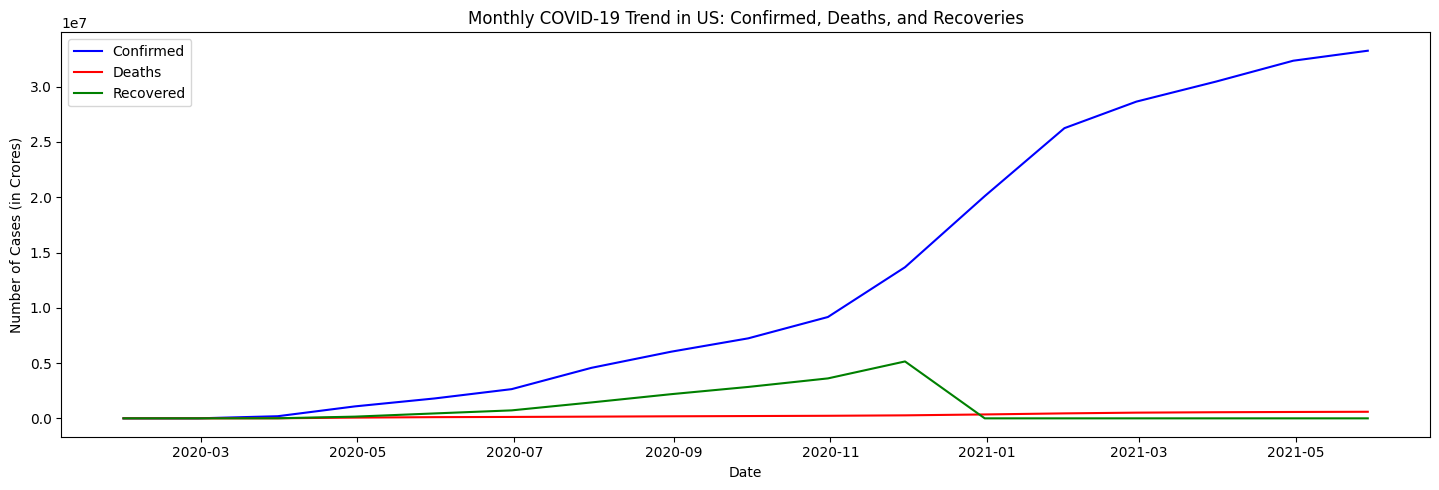

In [41]:
# Plot Monthly COVID-19 Trend in US: Confirmed, Deaths, and Recoveries
plt.figure(figsize=(14.5, 5))

plt.plot(us_monthly['Date'], us_monthly['Confirm'], label='Confirmed', color='blue')
plt.plot(us_monthly['Date'], us_monthly['Death'], label='Deaths', color='red')
plt.plot(us_monthly['Date'], us_monthly['Recoveries'], label='Recovered', color='green')
plt.title('Monthly COVID-19 Trend in US: Confirmed, Deaths, and Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Cases (in Crores)')
plt.legend()
plt.tight_layout()
plt.show()

#### Italy

In [42]:
# Italy's monthly data
italy_monthly = monthly_data[monthly_data['Country/Region'] == 'Italy']
italy_monthly

,Date,Country/Region,Confirm,New_Cases,Death,New_Deaths,Recoveries,New_Recoveries,Month
157,2020-01-31,Italy,2,2,0,0,0,0,2020-01
351,2020-02-29,Italy,1128,240,29,0,46,0,2020-02
543,2020-03-31,Italy,105792,4053,12428,0,15729,1109,2020-03
737,2020-04-30,Italy,205463,1872,27967,0,75945,4693,2020-04
930,2020-05-31,Italy,232997,333,33415,0,157507,1874,2020-05
1123,2020-06-30,Italy,240578,142,34767,0,190248,1052,2020-06
1317,2020-07-31,Italy,247537,379,35141,0,199974,178,2020-07
1509,2020-08-31,Italy,269214,996,35483,0,207653,0,2020-08
1703,2020-09-30,Italy,314861,1850,35894,0,227704,1198,2020-09
1896,2020-10-31,Italy,679430,31756,38618,0,289426,5859,2020-10


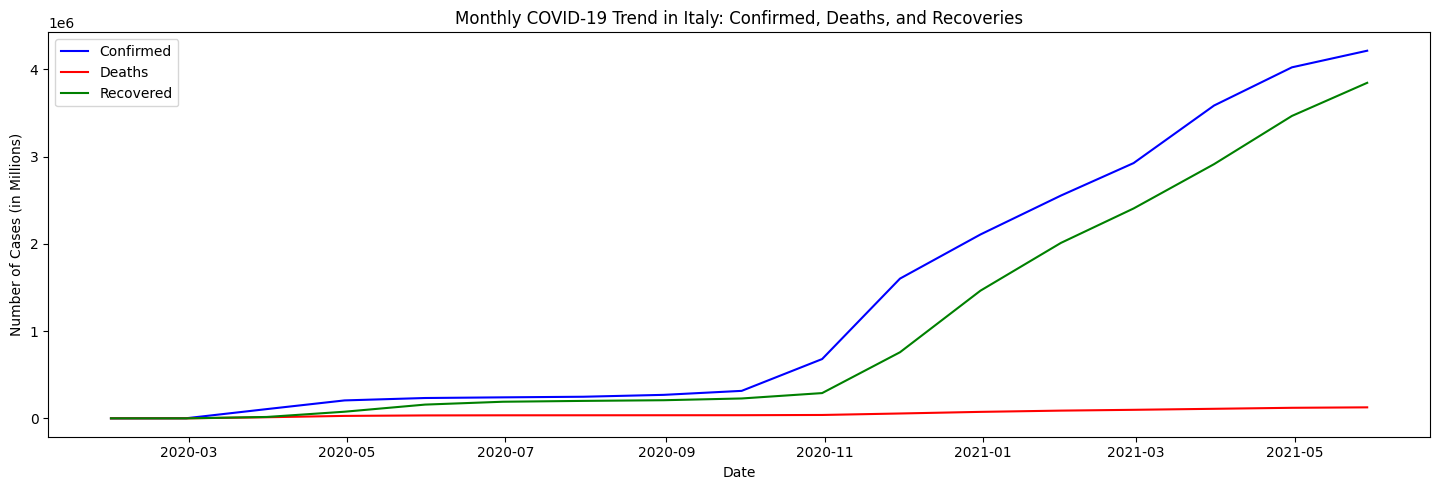

In [43]:
# Plot Italy's Monthly COVID-19 Trend: Confirmed, Deaths, and Recoveries
plt.figure(figsize=(14.5, 5))

plt.plot(italy_monthly['Date'], italy_monthly['Confirm'], label='Confirmed', color='blue')
plt.plot(italy_monthly['Date'], italy_monthly['Death'], label='Deaths', color='red')
plt.plot(italy_monthly['Date'], italy_monthly['Recoveries'], label='Recovered', color='green')
plt.title('Monthly COVID-19 Trend in Italy: Confirmed, Deaths, and Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Cases (in Millions)')
plt.legend()
plt.tight_layout()
plt.show()

#### Brazil

In [44]:
# Brazil's monthly data
brazil_monthly = monthly_data[monthly_data['Country/Region'] == 'Brazil']
brazil_monthly

,Date,Country/Region,Confirm,New_Cases,Death,New_Deaths,Recoveries,New_Recoveries,Month
120,2020-01-31,Brazil,0,0,0,0,0,0,2020-01
312,2020-02-29,Brazil,2,1,0,0,0,0,2020-02
506,2020-03-31,Brazil,5717,1138,201,0,127,7,2020-03
698,2020-04-30,Brazil,87187,7502,6006,0,35935,1803,2020-04
891,2020-05-31,Brazil,514849,16409,29314,0,206555,5663,2020-05
1084,2020-06-30,Brazil,1402041,33846,59594,0,788318,30507,2020-06
1303,2020-07-31,Brazil,2662485,52383,92475,0,2008854,52047,2020-07
1470,2020-08-31,Brazil,3908272,45961,121381,0,3268591,30976,2020-08
1689,2020-09-30,Brazil,4810935,33413,143952,0,4274774,37622,2020-09
1882,2020-10-31,Brazil,5535605,18947,159884,0,5005161,17726,2020-10


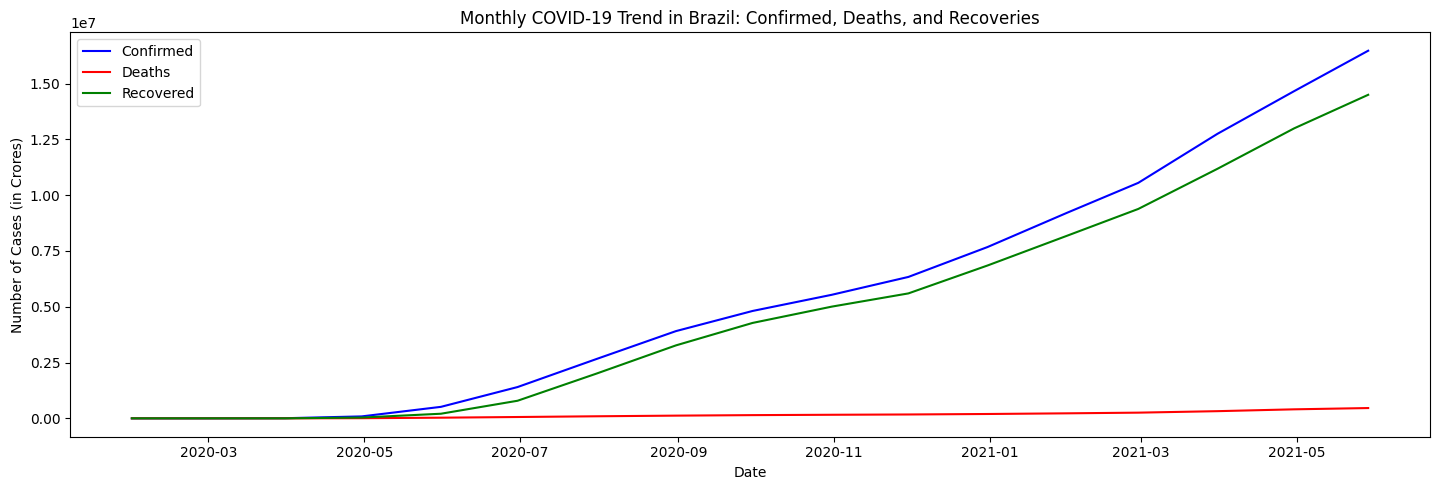

In [45]:
# Plot Brazil's Monthly COVID-19 Trend: Confirmed, Deaths, and Recoveries
plt.figure(figsize=(14.5, 5))

plt.plot(brazil_monthly['Date'], brazil_monthly['Confirm'], label='Confirmed', color='blue')
plt.plot(brazil_monthly['Date'], brazil_monthly['Death'], label='Deaths', color='red')
plt.plot(brazil_monthly['Date'], brazil_monthly['Recoveries'], label='Recovered', color='green')
plt.title('Monthly COVID-19 Trend in Brazil: Confirmed, Deaths, and Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Cases (in Crores)')
plt.legend()
plt.tight_layout()
plt.show()

### Question 8: Combined Data Analysis

#### Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [46]:
# Identify the three countries with the highest average death rates (deaths/confirmed cases) as of 2020-12-31

data_2020 = complete_dataset[complete_dataset['Date'] == '2020-12-31'].copy()
data_2020['Death_Rate'] = round((data_2020['Death']/data_2020['Confirm'])*100,2)

# Filter countries with more than 1000 confirmed cases to avoid small-sample bias,
top_death_rate = data_2020[data_2020['Confirm'] > 1000].sort_values('Death_Rate', ascending=False).head(3)
top_death_rate

,Date,Country/Region,Confirm,New_Cases,Death,New_Deaths,Recoveries,New_Recoveries,Month,Death_Rate
66582,2020-12-31,Yemen,2099,2,610,0,1394,2,2020-12,29.06
66507,2020-12-31,Mexico,1426094,12159,125807,0,1074795,8024,2020-12,8.82
66444,2020-12-31,Ecuador,212512,1000,14034,0,184507,0,2020-12,6.60


In [47]:
# Plot Death Rate of Top 3 Countries in 2020
fig = px.bar(
    top_death_rate,
    x='Country/Region',
    y='Death_Rate',
    color='Country/Region',
    title='COVID-19 Death Rate of Top 3 Countries in 2020',
    labels={'Death_Rate': 'Death Rate', 'Country/Region': 'Country'},
    template='plotly_dark'
)

fig.show()

#### Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

In [48]:
# Select the latest available data for South Africa from the complete_dataset

sa_data = complete_dataset[(complete_dataset['Country/Region'] == 'South Africa') & (complete_dataset['Date'] == complete_dataset['Date'].max())].iloc[0]

sa_data

,95310
Date,2021-05-29 00:00:00
Country/Region,South Africa
Confirm,1659070
New_Cases,4519
Death,56363
New_Deaths,0
Recoveries,1554184
New_Recoveries,2664
Month,2021-05


In [49]:
# Create a DataFrame to compare the number of deaths and recoveries in South Africa
df = pd.DataFrame({
    'metrices': ['Deaths', 'Recoveries'],
    'counts': [sa_data['Death'], sa_data['Recoveries']]
})

# Plot a bar chart to visualize the number of deaths vs recoveries in South Africa
fig = px.bar(
    df,
    x='metrices',
    y='counts',
    color='metrices',
    title='COVID-19 Deaths vs Recoveries in South Africa',
    labels={'counts': 'Number of Cases', 'metrices': ''},
    template='plotly_dark'
)
fig.show()

In [50]:
# Calculate death rate and recovery rate for South Africa as percentages
sa_death_rate = round((sa_data['Death']/sa_data['Confirm'])*100,2)
sa_recovery_rate = round((sa_data['Recoveries']/sa_data['Confirm'])*100,2)

# Create a DataFrame for plotting the rates
rate_df = pd.DataFrame({
    'metrices':['Deaths', 'Recoveries'],
    'rates': [sa_death_rate, sa_recovery_rate]
})

# Plot a bar chart comparing death rate and recovery rate for South Africa
fig = px.bar(
    rate_df,
    x='metrices',
    y='rates',
    color='metrices',
    title='COVID-19, South Africa: Deaths Rate vs Recoveries Rate',
    labels={'rates': 'Rates (%)', 'metrices': ''},
    template='plotly_dark'
)
fig.show()

#### Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

In [52]:
us_df = us_monthly[(us_monthly['Date']>='2020-03-01') & (us_monthly['Date']<='2025-05-31')].copy()
us_df['Recovery Ratio'] = round(us_df['Recoveries']/us_df['Confirm'],2)

In [53]:
# Plot the monthly recovery rate of the US from March 2020 to May 2021
fig = px.line(
    us_df,
    x='Date',
    y='Recovery Ratio',
    title='Monthly Recovery Rate of US (March, 2020 - May, 2021)',
    labels={'Recovery Ratio': 'Monthly Recovery Ratio', 'Date': 'Months'},
    template='plotly_dark',
    markers=True
)
fig.show()

# Note: In this dataset, recovery data for the US is incomplete. No recovery data is reported after Nov 2020.

In [54]:
# Here we are taking mean of 'Recovery  Ratio' and filling the missing values with it.
avg_recover_ratio = round(us_df['Recovery Ratio'].head(9).mean(),2)
us_df.loc[us_df['Date']>'2020-11-30', 'Recoveries'] = (us_df['Confirm']*avg_recover_ratio).astype('int64')
us_df.loc[us_df['Date']>'2020-11-30', 'Recovery Ratio'] = us_df['Recoveries']/us_df['Confirm']
us_df

,Date,Country/Region,Confirm,New_Cases,Death,New_Deaths,Recoveries,New_Recoveries,Month,Recovery Ratio
440,2020-03-31,US,192301,26314,5370,0,7024,1380,2020-03,0.04
635,2020-04-30,US,1081020,29220,66235,0,153947,33227,2020-04,0.14
828,2020-05-31,US,1798718,18987,107840,0,444758,28297,2020-05,0.25
1021,2020-06-30,US,2642174,46430,127607,0,720631,15428,2020-06,0.27
1213,2020-07-31,US,4567420,68719,154157,0,1438160,24005,2020-07,0.31
1407,2020-08-31,US,6026895,35388,183818,0,2184825,30886,2020-08,0.36
1599,2020-09-30,US,7235428,39434,207217,0,2840688,27383,2020-09,0.39
1792,2020-10-31,US,9165619,89695,231749,0,3612478,34026,2020-10,0.39
1986,2020-11-30,US,13670332,160570,271020,0,5146319,81289,2020-11,0.38
2179,2020-12-31,US,20099363,235667,352163,0,5627821,0,2020-12,0.28


In [55]:
# Plot the monthly recoveries of the US from March 2020 to May 2021 after filling missing values
fig = px.line(
    us_df,
    x='Date',
    y='Recoveries',
    title='Covid-19 Monthly Recovery Rate of US (March, 2020 - May, 2021)',
    labels={'Recovery Ratio': 'Monthly Recovery Ratio', 'Date': 'Months'},
    template='plotly_dark',
    markers=True
)
fig.show()